In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hist_contour as hc

plt.rcParams.update({"font.size": 15})

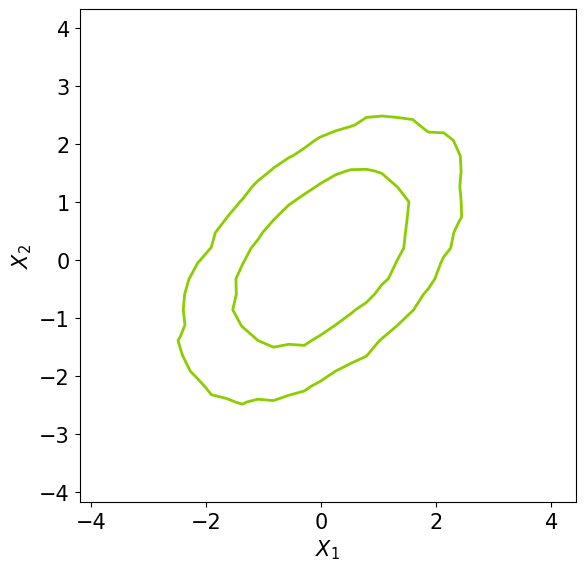

In [2]:
# plot some draws from a multivariate normal
X = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

hc.hist_contour(X[:,0], X[:,1], xlabel="$X_1$", ylabel="$X_2$")
plt.show()

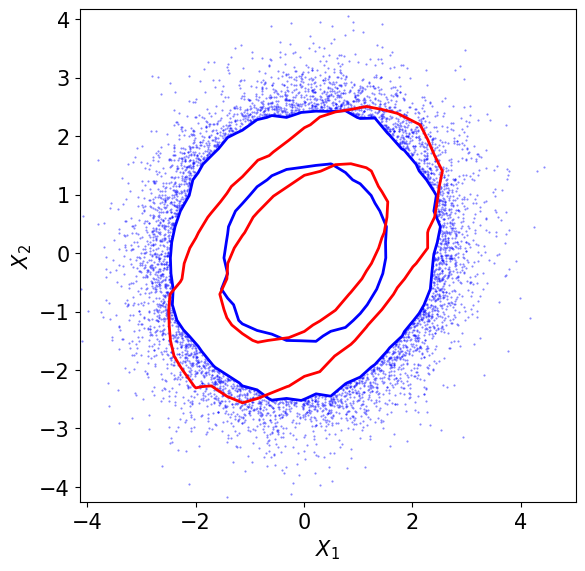

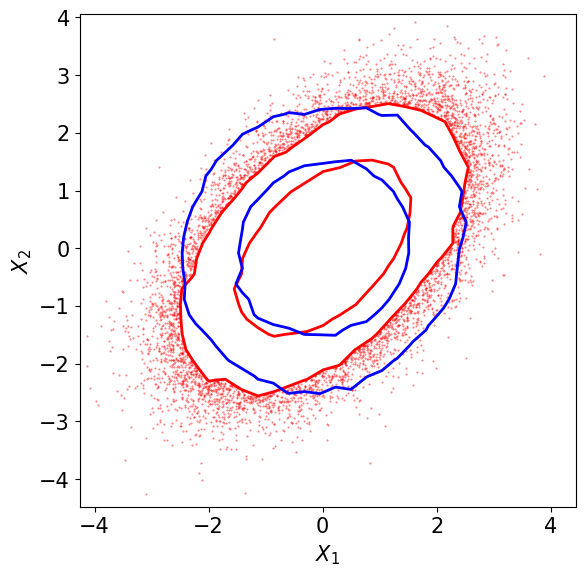

In [3]:
# a more complicated double layered example, with outliers
X1 = np.random.multivariate_normal([0, 0], [[1, 0.1], [0.1, 1]], 100000)
X2 = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 1]], 100000)

# we'll plot the outliers for X1, and just the contours for X2
ax = hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="blue")
hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="red")
plt.show()

# now we can try the other way around
ax = hc.hist_contour(X2[:,0], X2[:,1], xlabel="$X_1$", ylabel="$X_2$", show_outliers=True, colour="red")
hc.hist_contour(X1[:,0], X1[:,1], xlabel="$X_1$", ylabel="$X_2$", ax=ax, colour="blue")
plt.show()